# Introduction

The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservation status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


## Import Python Modules

First, import the primary modules that will be used in this project:

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Loading the Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents.


#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [352]:
species = pd.read_csv("species_info.csv")

In [353]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [354]:
observations = pd.read_csv("observations.csv")

In [355]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics

Next, there will be a check for the dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [356]:
species.shape

(5824, 4)

In [357]:
observations.shape

(23296, 3)

## Explore the Data

It is time to explore the `species` data a little more in depth. The first thing is to find the number of distinct species in the data. Use the column `scientific_name` to get 5,541 unique species. There seems to be a lot of species in the national parks!

In [358]:
species.duplicated().sum()

0

In [359]:
species["scientific_name"].nunique()

5541

Next is to find the number of `category` that are represented in the data and there are 7 including animals and plants.

In [360]:
species["category"].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

Here is a chance to drill one level deeper and see the count of `category` in the data. Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being the fewest with 79.

In [361]:
species["category"].value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

Another column to explore is `conservation_status`. The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values. 

In [362]:
species["conservation_status"].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

Next a count of the number of observations in the breakdown of the categories in `conservation_status` is done. There are 5,633 `nan` values which means that they are species without concerns. On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery. 

Note: In most cases coming across `nan` values must be treated carefully, but the absence of data here means that these species are not under any conservation status.

In [363]:
species["conservation_status"].value_counts(dropna=False)

NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

#### observations

The next section looks at `observations` data. The first task is to check the number of parks that are in the dataset and there are only 4 national parks.

In [364]:
observations.duplicated().sum()

15

In [365]:
observations.drop_duplicates(inplace=True)

In [366]:
observations.reset_index(inplace=True)

In [367]:
observations["park_name"].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

Here are the total number of observations logged in the parks, there are 3,314,739 sightings in the last 7 days... that's a lot of observations! 

In [368]:
observations["observations"].sum()

3312429

## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [369]:
species["conservation_status"].fillna("No Intervention", inplace=True)

In [370]:
species["conservation_status"].value_counts()

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals. 

In [371]:
df2 = species[species["conservation_status"] != "No Intervention"].\
groupby("conservation_status")["category"].value_counts().reset_index(name="count")
df2

,conservation_status,category,count
0,Endangered,Mammal,7
1,Endangered,Bird,4
2,Endangered,Fish,3
3,Endangered,Amphibian,1
4,Endangered,Vascular Plant,1
5,In Recovery,Bird,3
6,In Recovery,Mammal,1
7,Species of Concern,Bird,72
8,Species of Concern,Vascular Plant,43
9,Species of Concern,Mammal,28


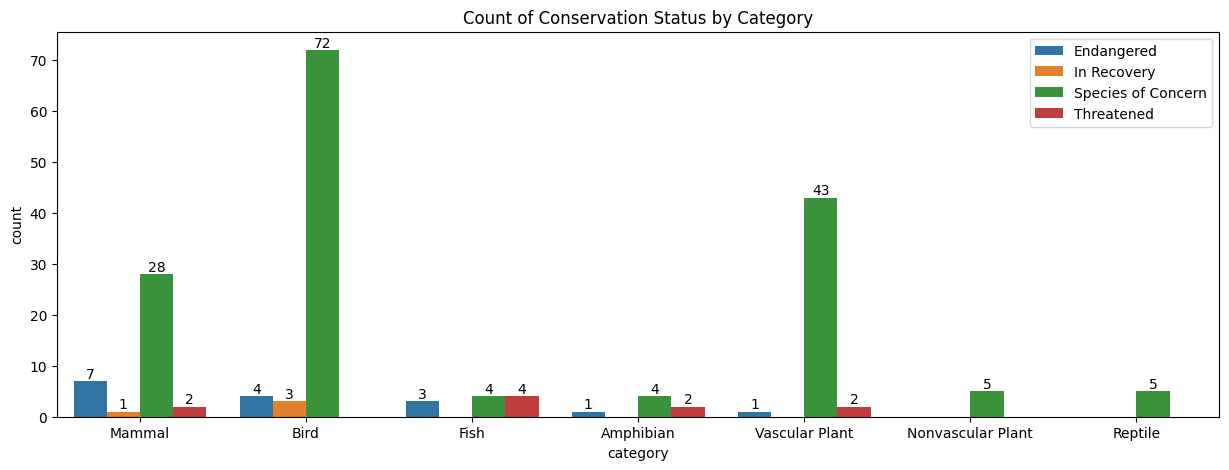

In [372]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data = df2, x = "category", y = "count", hue = "conservation_status")

for i in ax.containers:
    ax.bar_label(i)
    
plt.legend(loc=1)
plt.title("Count of Conservation Status by Category");

#### In conservation

The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`. 

In [373]:
species["is_protected"] = species["conservation_status"].\
                          apply(lambda x : "Not Protected" if x == "No Intervention" else "Protected")

In [374]:
species["is_protected"].value_counts()

Not Protected    5633
Protected         191
Name: is_protected, dtype: int64

Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [375]:
df3 = species.groupby(["category", "is_protected"])["scientific_name"].nunique().reset_index(name="count")
df3

,category,is_protected,count
0,Amphibian,Not Protected,72
1,Amphibian,Protected,7
2,Bird,Not Protected,413
3,Bird,Protected,75
4,Fish,Not Protected,115
5,Fish,Protected,11
6,Mammal,Not Protected,146
7,Mammal,Protected,30
8,Nonvascular Plant,Not Protected,328
9,Nonvascular Plant,Protected,5


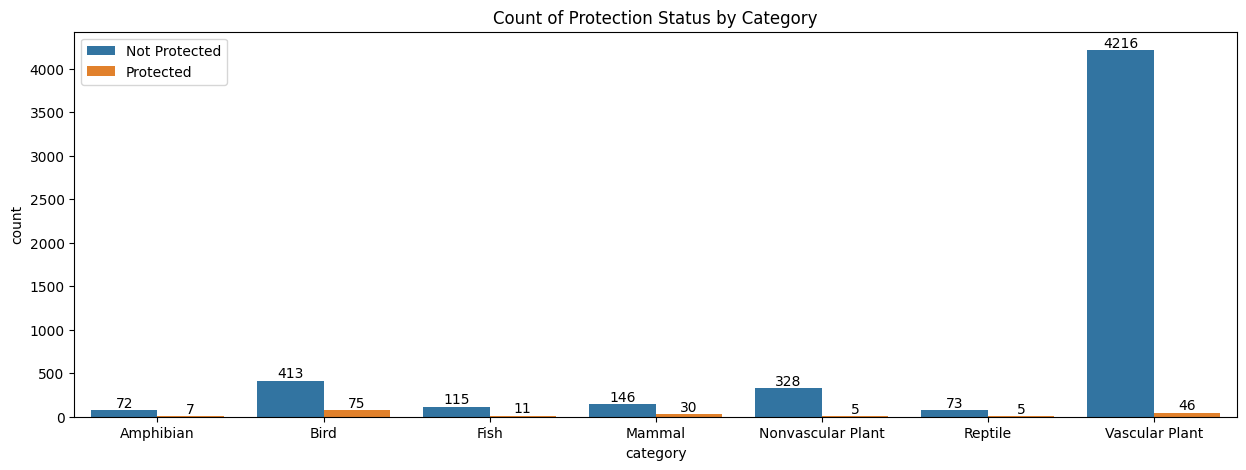

In [376]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data = df3, x = "category", y = "count", hue = "is_protected")

for i in ax.containers:
    ax.bar_label(i)
    
plt.legend(loc=2)
plt.title("Count of Protection Status by Category");

Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each `category` exhibits in the data. From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds. 

In [377]:
species.groupby("category")["is_protected"].value_counts(normalize=True).reset_index(name="Percentage")

,category,is_protected,Percentage
0,Amphibian,Not Protected,0.912500
1,Amphibian,Protected,0.087500
2,Bird,Not Protected,0.848369
3,Bird,Protected,0.151631
4,Fish,Not Protected,0.913386
5,Fish,Protected,0.086614
6,Mammal,Not Protected,0.822430
7,Mammal,Protected,0.177570
8,Nonvascular Plant,Not Protected,0.984985
9,Nonvascular Plant,Protected,0.015015


#### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [388]:
df3.loc[df3["category"] == "Mammal"]

,category,is_protected,count
6,Mammal,Not Protected,146
7,Mammal,Protected,30


In [389]:
df3.loc[df3["category"] == "Bird"]

,category,is_protected,count
2,Bird,Not Protected,413
3,Bird,Protected,75


In [390]:
contingency1 = [[30, 146],
                [75, 413]]
contingency1

[[30, 146], [75, 413]]

In [391]:
chi2, p, dof, expected = stats.chi2_contingency(contingency1)
print(f"chi2 : {round(chi2,2)}\np : {round(p,2)}\ndof: {round(dof,2)}\nexpected:{expected}")

chi2 : 0.16
p : 0.69
dof: 1
expected:[[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]


The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

This time the p-value is 0.04 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [393]:
df3.loc[df3["category"] == "Mammal"]

,category,is_protected,count
6,Mammal,Not Protected,146
7,Mammal,Protected,30


In [392]:
df3.loc[df3["category"] == "Reptile"]

,category,is_protected,count
10,Reptile,Not Protected,73
11,Reptile,Protected,5


In [394]:
contingency2 = [[30, 146],
                [5, 73]]
contingency1

[[30, 146], [75, 413]]

In [395]:
chi2, p, dof, expected = stats.chi2_contingency(contingency2)
print(f"chi2 : {round(chi2,2)}\np : {round(p,2)}\ndof: {round(dof,2)}\nexpected:{expected}")

chi2 : 4.29
p : 0.04
dof: 1
expected:[[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]]


#### Species in Parks

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names. 

In [552]:
from collections import Counter
import string

In [491]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [501]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    return text

In [517]:
common_names = species.loc[species["category"] == "Mammal", "common_names"].\
apply(remove_punctuations).str.split().tolist()

common_names[10:20]

[['Common', 'Gray', 'Fox', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Fox', 'Red', 'Fox', 'Silver', 'Fox'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

In [529]:
clean_rows = []
for item in common_names:
    item = list(set(item))
    clean_rows.append(item)
clean_rows[10:20]

[['Fox', 'Gray', 'Common'],
 ['Silver', 'Black', 'Cross', 'Red', 'Fox'],
 ['Red', 'Fox'],
 ['Lion', 'Mountain'],
 ['Wildcat', 'Wild', 'Cat'],
 ['Bobcat'],
 ['Lion', 'Mountain', 'Panther'],
 ['Striped', 'Skunk'],
 ['Skunk', 'Eastern', 'Spotted'],
 ['River', 'Otter']]

Next the words need to be collapsed into one list for easier use.

In [548]:
names_list = []
for row in clean_rows:
    for name in row:
        names_list.append(name)
        

Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that `Bat` occurred 23 times while `Shrew` came up 18 times.

In [594]:
pd.DataFrame.from_dict(dict(Counter(names_list)), orient="index", columns=["count"]).\
sort_values(by="count",ascending=False)

,count
Bat,23
Shrew,18
Myotis,17
Mouse,16
Chipmunk,13
...,...
Stones,1
WhiteFooted,1
Cotton,1
Golden,1


In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [623]:
species["is_bat"] = species["common_names"].str.contains(r"\bBat\b", regex=True)

Here is a subset of the data where `is_bat` is true, returning see the rows that matched. There seems to be a lot of species of bats and a mix of protected vs. non-protected species. 

In [624]:
species.loc[species["is_bat"]]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,Not Protected,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,Protected,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,Protected,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,Not Protected,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,Not Protected,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,Protected,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,Protected,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,Protected,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,Protected,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,Not Protected,True


Next the results of the bat species will be merged with `observations` to create a `DataFrame` with observations of bats across the four national parks.  

In [641]:
bat_observations = pd.merge(species.loc[species["is_bat"]], observations).drop(columns="index")
bat_observations.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,park_name,observations
0,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,Not Protected,True,Yosemite National Park,188
1,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,Not Protected,True,Great Smoky Mountains National Park,80
2,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,Not Protected,True,Bryce National Park,57
3,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,Not Protected,True,Yellowstone National Park,259
4,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,Protected,True,Yellowstone National Park,227


Let's see how many total bat observations(across all species) were made at each national park.  

The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411. 

In [642]:
bat_obs_by_park = bat_observations.groupby("park_name")["observations"].sum().reset_index()
bat_obs_by_park

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


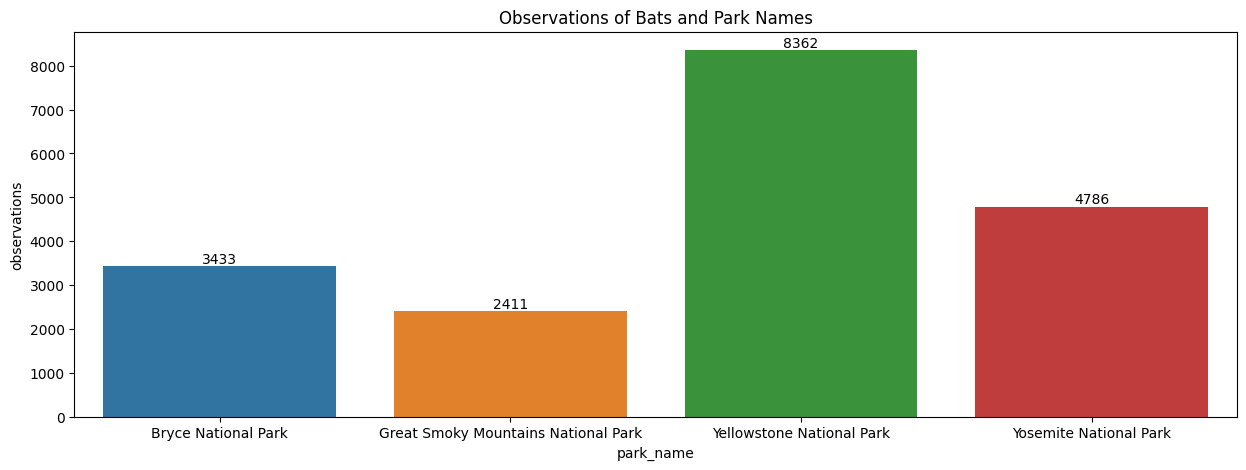

In [665]:
plt.figure(figsize = (15, 5))
ax = sns.barplot(data = bat_obs_by_park, x = "park_name", y = "observations")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Observations of Bats and Park Names");

Now let's see each park broken down by protected bats vs. non-protected bat sightings. It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [658]:
bat_obs_by_park2 = bat_observations.groupby(["park_name", "is_protected"])["observations"].\
                                    sum().reset_index()
bat_obs_by_park2

,park_name,is_protected,observations
0,Bryce National Park,Not Protected,1596
1,Bryce National Park,Protected,1837
2,Great Smoky Mountains National Park,Not Protected,1299
3,Great Smoky Mountains National Park,Protected,1112
4,Yellowstone National Park,Not Protected,4044
5,Yellowstone National Park,Protected,4318
6,Yosemite National Park,Not Protected,2345
7,Yosemite National Park,Protected,2441


Below is a plot from the output of the last data manipulation. From this chart one can see that Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen more non-protected species.

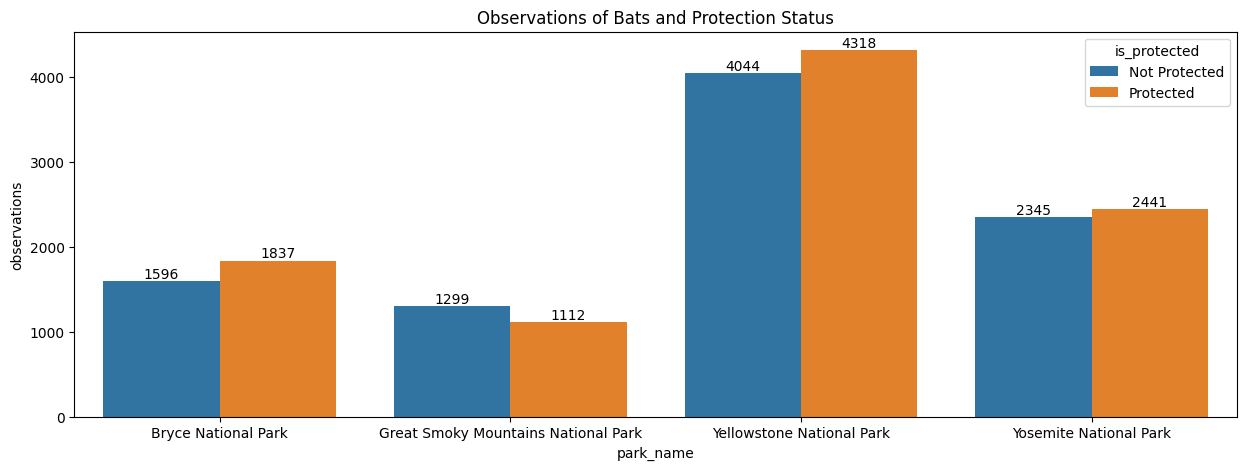

In [666]:
plt.figure(figsize = (15, 5))
ax = sns.barplot(data = bat_obs_by_park2, x = "park_name", y = "observations", hue="is_protected")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Observations of Bats and Protection Status");

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.


## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 